In [1]:
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scripts.read_land_use_no_gdal as rlu
import scripts.read_image_data_scaleable as rid

In [6]:
from importlib import reload
reload(rid)

<module 'scripts.read_image_data_scaleable' from '../scripts/read_image_data_scaleable.py'>

In [3]:
# area 1
polygon = "POLYGON ((143.32317350376297 -37.496296386368165, 143.32180000642074 -37.70330610816869, 143.59543478539388 -37.70317028876007, 143.5968081449812 -37.49575155973978, 143.32317350376297 -37.496296386368165))"
# area 3
# polygon = "POLYGON ((144.0229424345357 -37.55299953752239, 144.02019905996406 -37.97282887730929, 144.6632499098556 -37.972670022747636, 144.66240633494579 -37.552454710108975, 144.0229424345357 -37.55299953752239))"
# large area
# polygon = "POLYGON ((142.2509765625 -36.564271808625506, 142.2784423828125 -37.837462426016096, 144.55810546875 -37.837462426016096, 144.5306396484375 -36.55544720555245, 142.2509765625 -36.564271808625506))"
array, classes = rlu.read_land_use(da_shapefile="../SDM324649_full/ll_gda94/sde_shape/whole/VIC/CATCHMENTS/layer/landuse_2014.shp",
#                   resolution=(8562, 5999),
                  area_filter=polygon,
                  buffer=-0.0001,
                  processes=12)

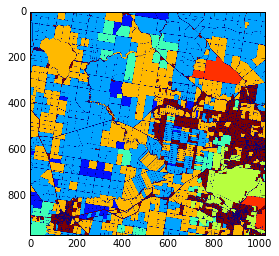

In [4]:
plt.imshow(array)

In [7]:
train = rid.old_data_preprocess_workflow(image_dir='../area1/2014/images/',
                                         mask_dir='../area1/2014/masks/', 
                                         table_dir='../area1/2014/tables/LC8_SR.csv', 
                                         new_table_dir='../area1/2015/tables/LC8_SR.csv', 
                                         shelve_root_dir='../models/area1/shelves/', 
                                         labels=array, 
                                         processes=8, 
                                         max_days_apart=30, 
                                         step=10000)

reading data...
reading new timestamps...
interpolating images...


Exception ignored in: <bound method Shelf.__del__ of <shelve.DbfilenameShelf object at 0x7fd6a1571128>>
Exception ignored in: <bound method Shelf.__del__ of <shelve.DbfilenameShelf object at 0x7fd6a1571668>>
Exception ignored in: <bound method Shelf.__del__ of <shelve.DbfilenameShelf object at 0x7fd6a1571320>>
Exception ignored in: <bound method Shelf.__del__ of <shelve.DbfilenameShelf object at 0x7fd6a15712b0>>
Exception ignored in: <bound method Shelf.__del__ of <shelve.DbfilenameShelf object at 0x7fd6a1571630>>


generating sets...


try to recover label map

In [20]:
train['0'][1].shape

(10000, 121)

In [39]:
keys = list(train.keys())
keys.sort(key=int)  # important: cannot sort as string
labels_set = [train[k][1].ix[:, -1] for k in keys]

In [40]:
labels = pd.concat(labels_set, axis=0)

In [41]:
labels.shape

(994406,)

In [42]:
head = rid.generate_coordinate_columns(973, 1022)

In [43]:
df = pd.DataFrame(np.concatenate([head, labels.reshape(len(labels), 1)], axis=1))

In [44]:
cls_map = df.pivot(index=0, columns=1, values=2)

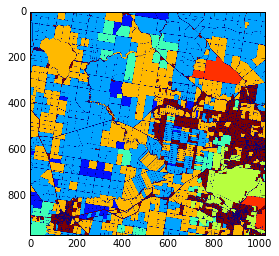

In [45]:
plt.imshow(cls_map)